# Medical Cost Personal Datasets
* https://www.kaggle.com/datasets/mirichoi0218/insurance

EDA + Regression 필사
* https://www.kaggle.com/code/hely333/eda-regression

## 데이터 로드

In [21]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
from glob import glob
glob('data/medical/*')

['data/medical\\insurance.csv']

In [23]:
data = pd.read_csv('data/medical\\insurance.csv')

In [24]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## 인코딩

* 학습을 시킬 때, 문자를 수치로 변환. ex) female은 1, male은 2
* 이 역할을 하는 함수가 LabelEncoder
* 결측값을 채우지 않고 LabelEncoder를 하면 에러가 난다.
* fit과 transform을 합쳐서 le.fit_transform()


* 'region'과 같은 범주형 변수는 OneHotEncoder로 인코딩하는 것이 좋다.
* 하지만 이 경우에는 region에 특별한 순서(order)가 없어 바뀌는 것이 없기 때문에 저자?가 Label Encoder만 써주었다.

In [26]:
from sklearn.preprocessing import LabelEncoder

# sex
le = LabelEncoder()
le.fit(data["sex"].drop_duplicates())
data["sex"] = le.transform(data["sex"])

# smoker or not
le.fit(data["smoker"].drop_duplicates())
data["smoker"] = le.transform(data["smoker"])

# region
le.fit(data["region"].drop_duplicates())
data["region"] = le.transform(data["region"])

In [27]:
data.corr()["charges"].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

## 상관관계 확인 후 시각화
* smoking과 charges 의 강한 상관관계
* np.ones, np.zeros, np.ones_like, np.zeros_like 설명
* https://jimmy-ai.tistory.com/84

In [82]:
# h_neg, h_pos = anchor hues, [0, 359]
# s: anchor saturation
# l: anchor lightness
# n: number of colors in the palette
# center: light or dark

<AxesSubplot:>

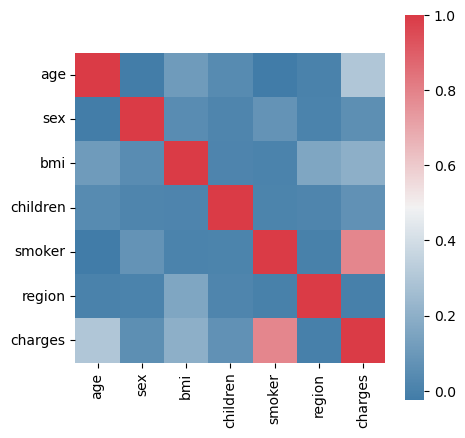

In [28]:
f, ax = plt.subplots(figsize=(5,5))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240, 10, as_cmap=True), square=True, ax=ax)

## bokeh
* distribution of charges : 환자들의 평균 cost of treatment를 아는데 도움이 된다.
* bokeh.io는 보케의 입출력 기능을 사용해 표시할 수 있는 기능을 제공
* bokeh.plotting은 그래프를 그리는 역할
* output_notebook()은 함수를 파라미터 전달 없이 사용하면 앞으로 출력될 그래프들이 노트북에 바로 출력
* 공식 문서 : https://docs.bokeh.org/en/latest/

In [36]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot

# bokeh.plotting 모듈의 figure() 함수는 도화지를 만드는 역할을 수행.
# show() 함수로 출력
from bokeh.plotting import figure, show, output_file
p = figure(title="Distribution of charges",tools="save",
            background_fill_color="#E8DDCB")

hist, edges = np.histogram(data.charges)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'

# gridplot() 제거
show(p, ncols = 2, width=400, height=400, toolbar_location=None)

Loading BokehJS ...

## smoking / charges

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

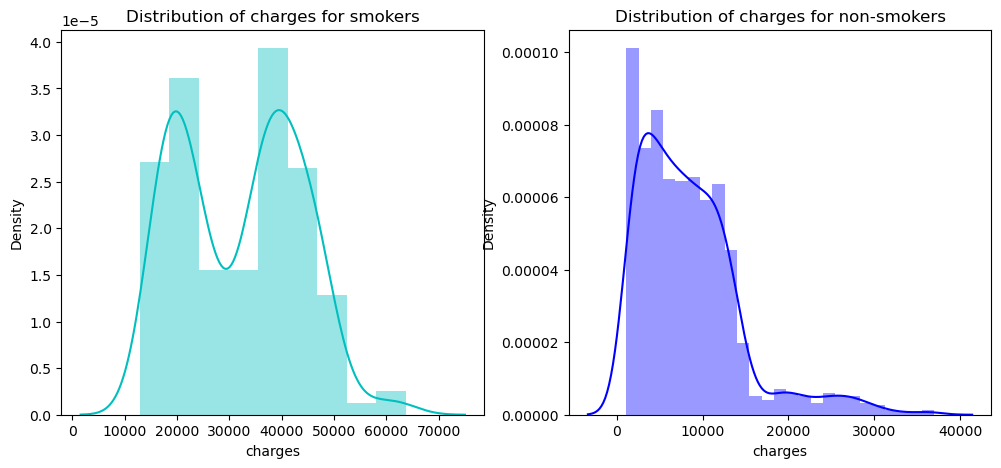

In [34]:
# pl.figure를 pl로 변경
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

* Smoking 환자들은 treatment에 더 많은 소비를 한다. 하지만 non-smoking 환자들의 수가 더 많아 보이기 때문에 확인이 필요하다.


### smoking / sex
* 아래의 그래프에서 women은 1, men은 0.
* 비흡연자가 더 많다.
* men smoker가 더 많다.
* -> men의 total cost of treatment가 smoking의 영향을 받아 더 많을 것이다.

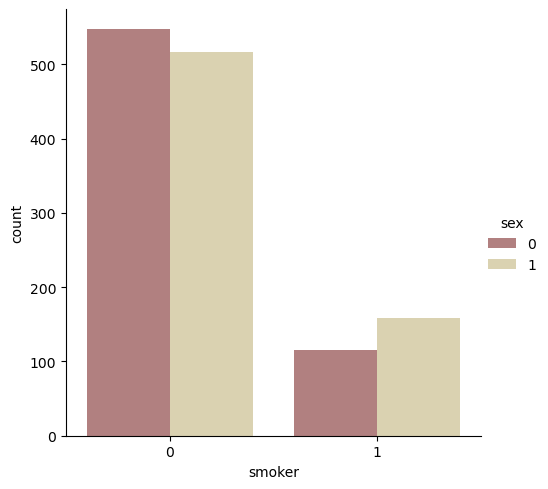

In [41]:
sns.catplot(x="smoker", kind="count", hue="sex", palette="pink", data=data)

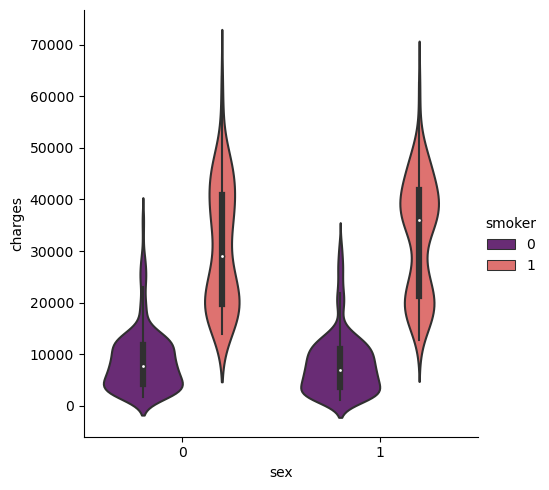

In [42]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = 'magma')

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

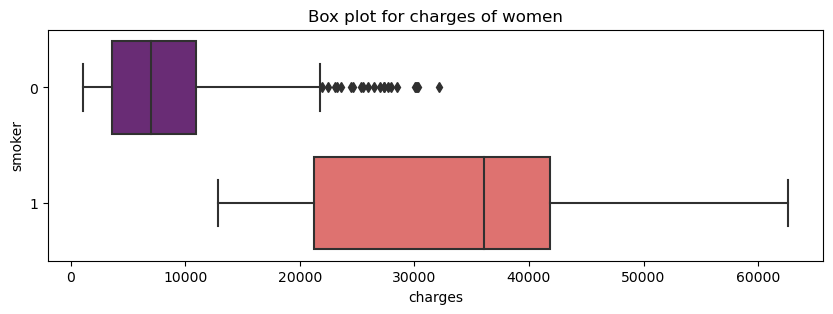

In [46]:
plt.figure(figsize=(10, 3))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data["sex"] == 1)] , orient="h", palette = 'magma')

# orient는 그래프를 나타내는 모양
# h는 horizontal 가로형 박스 그래프, v는 vertical 세로형 박스 그래프

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

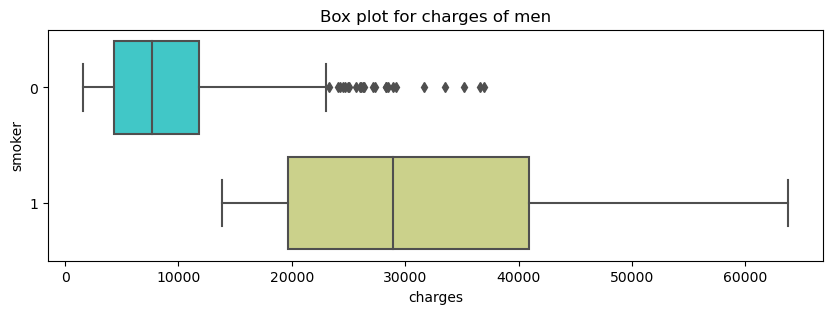

In [48]:
plt.figure(figsize=(10,3))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data["sex"] == 0)] , orient="h", palette = 'rainbow')

## age

* age와 cost of treatment의 관계
* 어떤 age가 더 주목할만한 연령대인지 확인

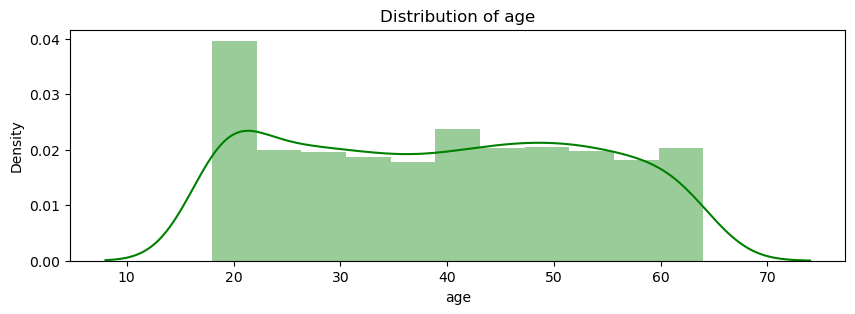

In [49]:
plt.figure(figsize=(10,3))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

In [50]:
data["age"].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

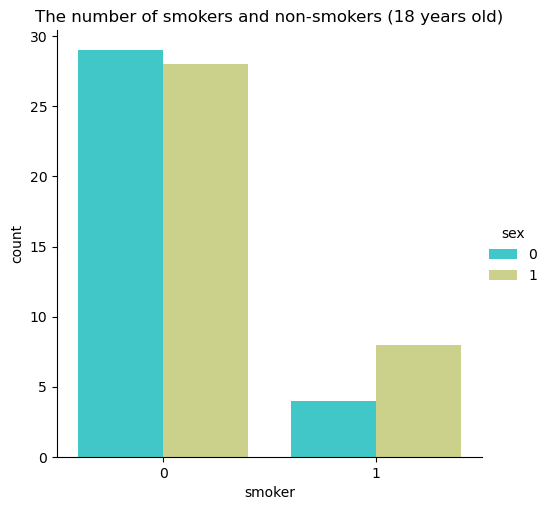

In [56]:
# 20대 이하 데이터 존재, maximum age는 64세 -> 18세 연령대에 smoker가 있는가?

sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data["age"] == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

<AxesSubplot:title={'center':'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

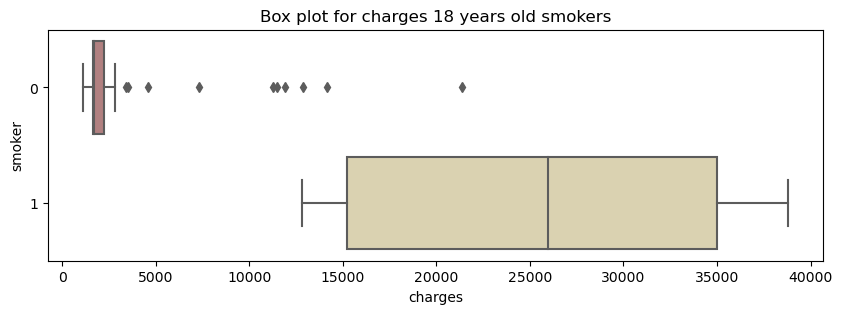

In [57]:
# smoking이 18세 연령대의 cost of treatment에 영향을 미치는가?
# 영향을 미친다.
# non-smoker의 tails는 serious diseases or accidents 때문으로 예상

plt.figure(figsize=(10,3))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data["age"] == 18)] , orient="h", palette = 'pink')

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

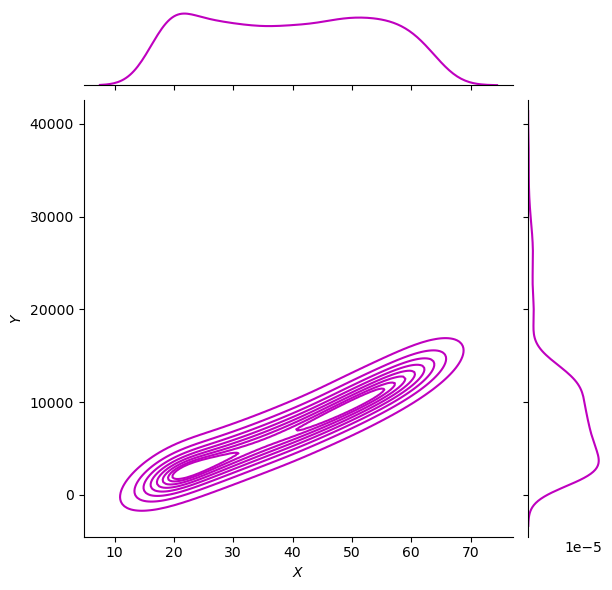

In [58]:
g = sns.jointplot(x="age", y="charges", data = data[(data["smoker"] == 0)] ,kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

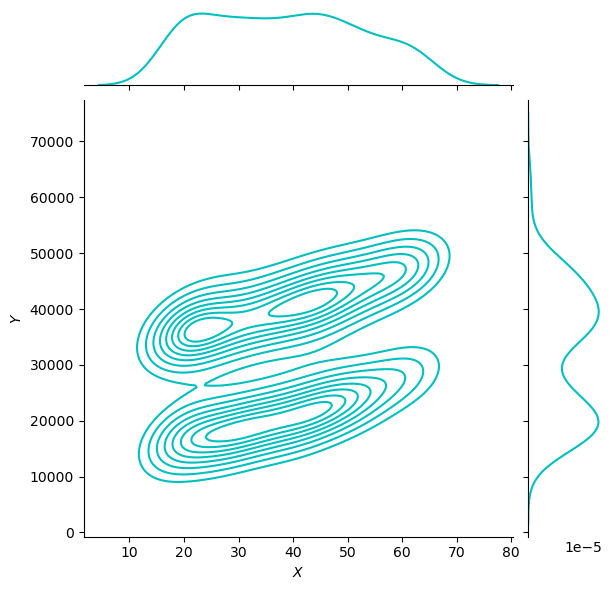

In [60]:
g = sns.jointplot(x="age", y="charges", data = data[(data["smoker"] == 1)],kind="kde", color="c")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

In [61]:
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data["smoker"] == 0)]["age"],y=data[(data["smoker"] == 0)]["charges"],
         size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)

show(p)

In [62]:
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 1)].age,y=data[(data.smoker == 1)].charges, size=7, line_color="navy", fill_color="red", fill_alpha=0.9)
show(p)

Text(0.5, 1.0, 'Smokers and non-smokers')

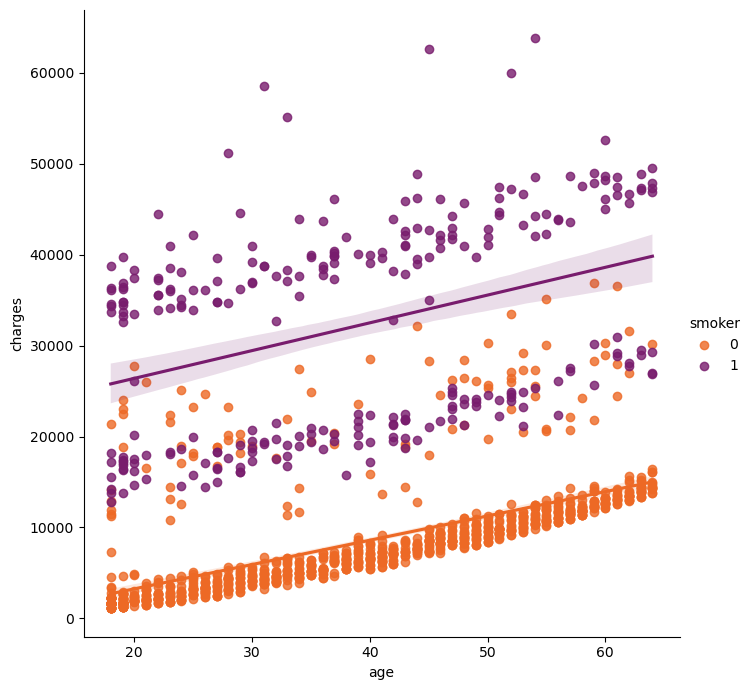

In [63]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

* non-smoker : age가 높으면 cost of treatment도 증가.
* smoker : 위와 같은 상관성이 없음.
* 아래에서는 bmi를 살펴봄

## BMI

* 정규 분포
* costs와 BMI>30, BMI<30을 비교해볼 예정

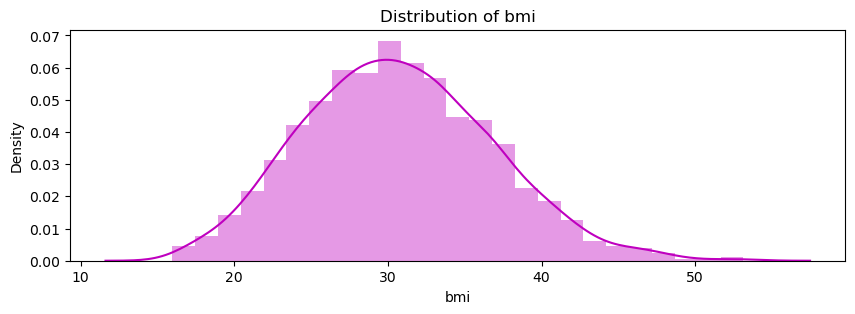

In [65]:
plt.figure(figsize=(10,3))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

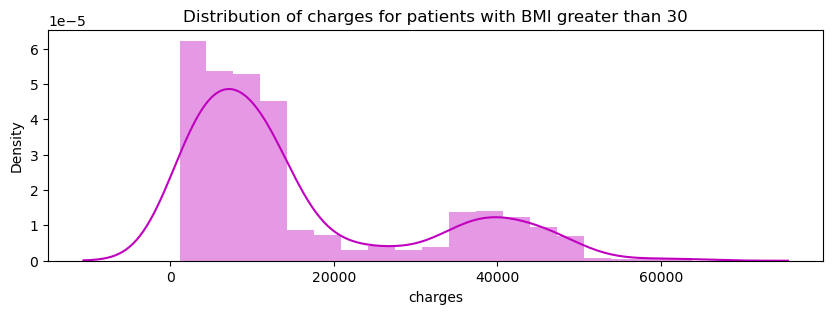

In [67]:
# BMI > 30에서 소비가 더 많음.

plt.figure(figsize=(10,3))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data["bmi"] >= 30)]['charges'], color = 'm')

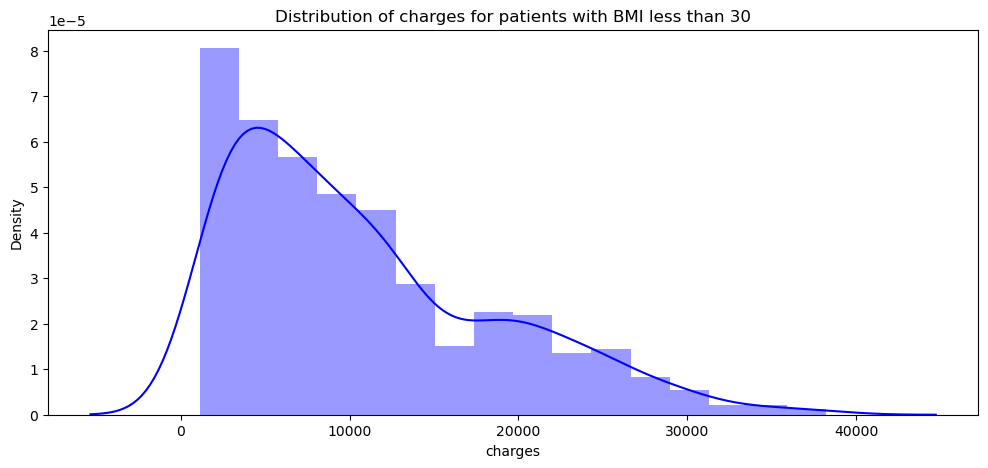

In [68]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data["bmi"] < 30)]['charges'], color = 'b')

Text(0.5, 1.0, 'Distribution of bmi and charges')

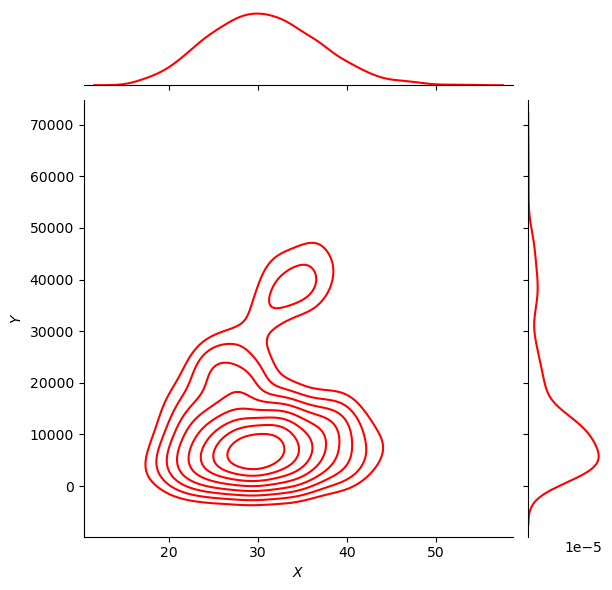

In [69]:
g = sns.jointplot(x="bmi", y="charges", data = data, kind="kde", color="r")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')

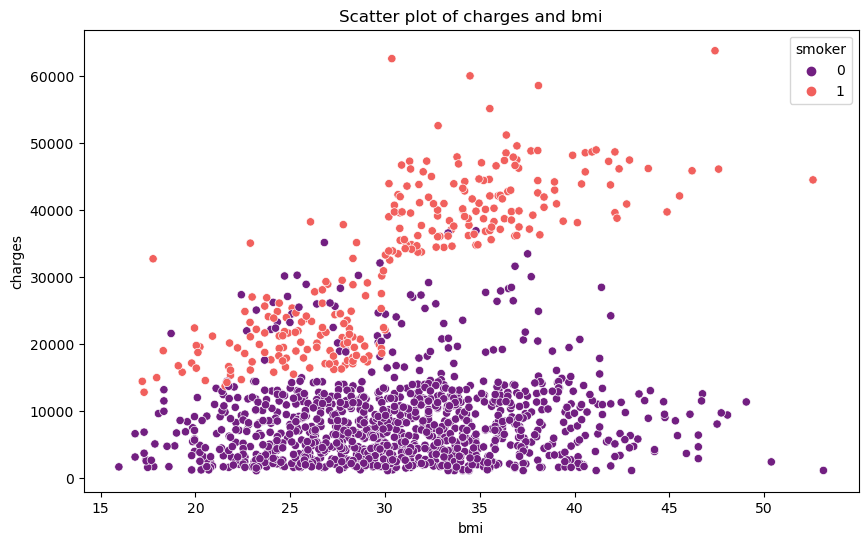

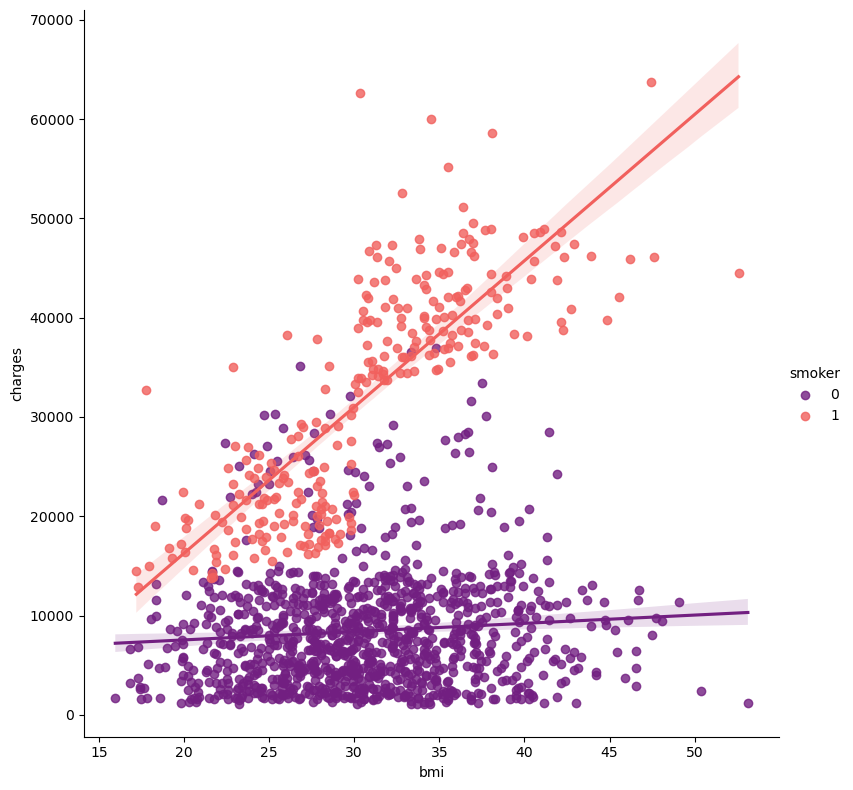

In [70]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma', size = 8)

## children

* 몇 명의 children이 있는지
* children이 있는데, smoker인 경우
* -> non-smoker인 parents가 더 많음

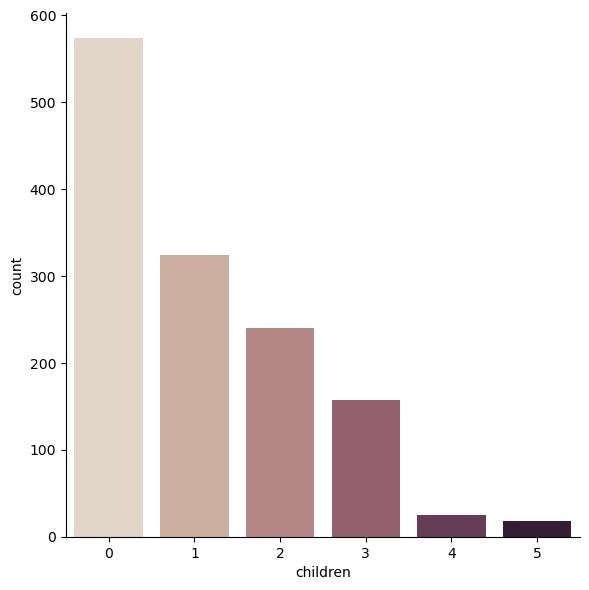

In [71]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

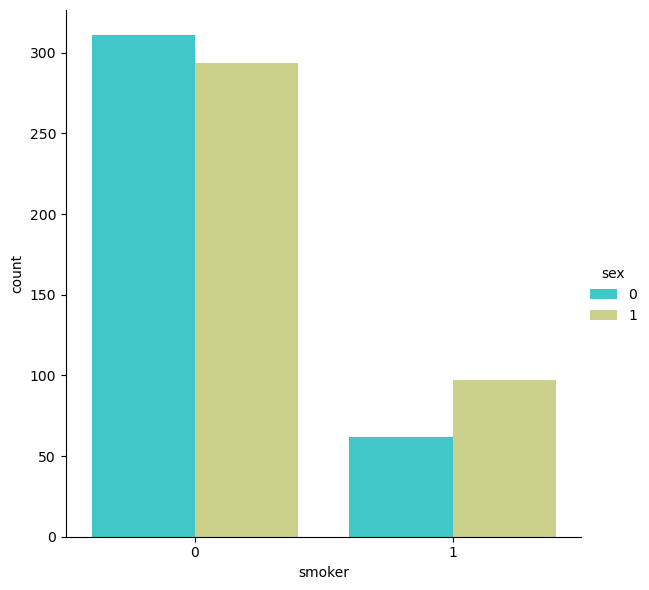

In [72]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

## linear regression

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [74]:
X = data.drop(['charges'], axis = 1)
y = data.charges

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0)
lr = LinearRegression().fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test,y_test))

0.7962732059725786


In [75]:
# random_state = 42로 했을 경우, 0.7668905583460909

# X = data.drop(['charges'], axis = 1)
# y = data.charges

# X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42)
# lr = LinearRegression().fit(X_train,y_train)

# y_train_pred = lr.predict(X_train)
# y_test_pred = lr.predict(X_test)

# print(lr.score(X_test,y_test))

0.7668905583460909


## polynomial(다항식)

* degree 최고차수 지정

In [76]:
X = data.drop(['charges','region'], axis = 1)
Y = data.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147238


## RandomForestRegressor

* 선형회귀의 평가 지표


### MSE(Mean Square of Errors) 평균제곱오차
* 제곱으로 인해 원래 차이보다 민감한 성능 평가가 될 수 있다.
* 예측값 - 관측값 의 제곱된 값의 평균
* 제곱하는 이유는 잔차의 값이 음수가 되는 것을 방지, 제곱을 함으로써 오차의 민감도를 높이기 위함


### R2(R Squared Score) 결정계수
* 0~1까지 수로 나타내어지며, 1에 가까울수록 100%의 설명력
* 분산을 기반으로 측정하는 도구
* 표본이 많을수록 정확도가 올라간다.

In [79]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(X_train,y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 3795971.805, MSE test data: 23201204.365
R2 train data: 0.974, R2 test data: 0.846


### 시각화

* hlines() : 수평선을 표시하는 matplotlib.pyplot의 모듈
* 점(xmin, y) 에서 점(xmax, y)를 따라 수평선을 표시

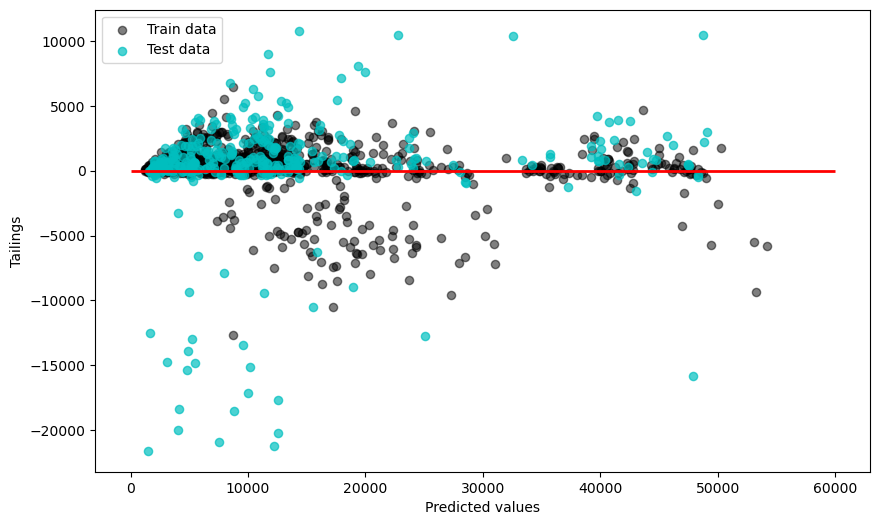

In [80]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()